In [ ]:
IDENTIFIER = "haydn-op1"

import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from dimod import BinaryQuadraticModel
from dwave.samplers import SteepestDescentSolver, SimulatedAnnealingSampler
from dwave.system import DWaveSampler, FixedEmbeddingComposite
import dwave_networkx as dnx
import dwave.inspector
from qubo import createBQM

picklePath = f"../Pickles/{IDENTIFIER}/{IDENTIFIER}_"
numberPath = lambda id, num : f"../Pickles/{id}/{num}/{id}_{num}_"

instruments = json.load(open(numpath + "instruments.json"))
embedding = json.load(open(numpath + "embedding.json", "r"))

sampler = FixedEmbeddingComposite(DWaveSampler(), embedding)

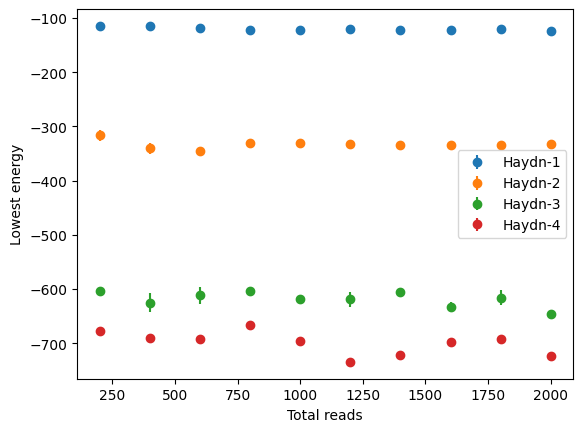

In [ ]:
def plotNormalisedReads(path: str, parameter: str):

    data = pd.read_csv(path + "qa-reads.csv")
    range = data["Total reads"].unique()

    bqm = BinaryQuadraticModel.from_serializable(json.load(open(path + "bqm.json", "r")))
    variables = len(bqm.linear)

    means = []
    stderr = []

    for r in range:
        query = data.query(f"`Total reads` == {r}")[parameter]
        means.append(np.mean(query) / variables) # Normalise by number of variables
        stderr.append(np.std(query) / np.sqrt(len(query)) / variables)

    plt.errorbar(range, means, yerr=stderr, fmt='o', label=i)
    plt.xlabel("Total reads")
    plt.ylabel(f"{parameter} (normalised)")

for i in identifiers:
    path = f"../Pickles/{i}/{i}_"

    bqm = BinaryQuadraticModel.from_serializable(json.load(open(path + "bqm.json", "r")))
    embedding = json.load(open(path + "embedding.json", "r"))
    
    bqms.append(bqm)
    embeddings.append(embedding)
    
    variables = len(bqm.linear)
    qubits = sum(len(i) for i in embedding.values())

    #plotNormalisedReads(path, "Lowest energy")

    plotCSV(path+"qa-reads.csv", "Total reads", "Lowest energy", label=i)
   
#plt.ylim(-1,0)
plt.legend()
plt.show()

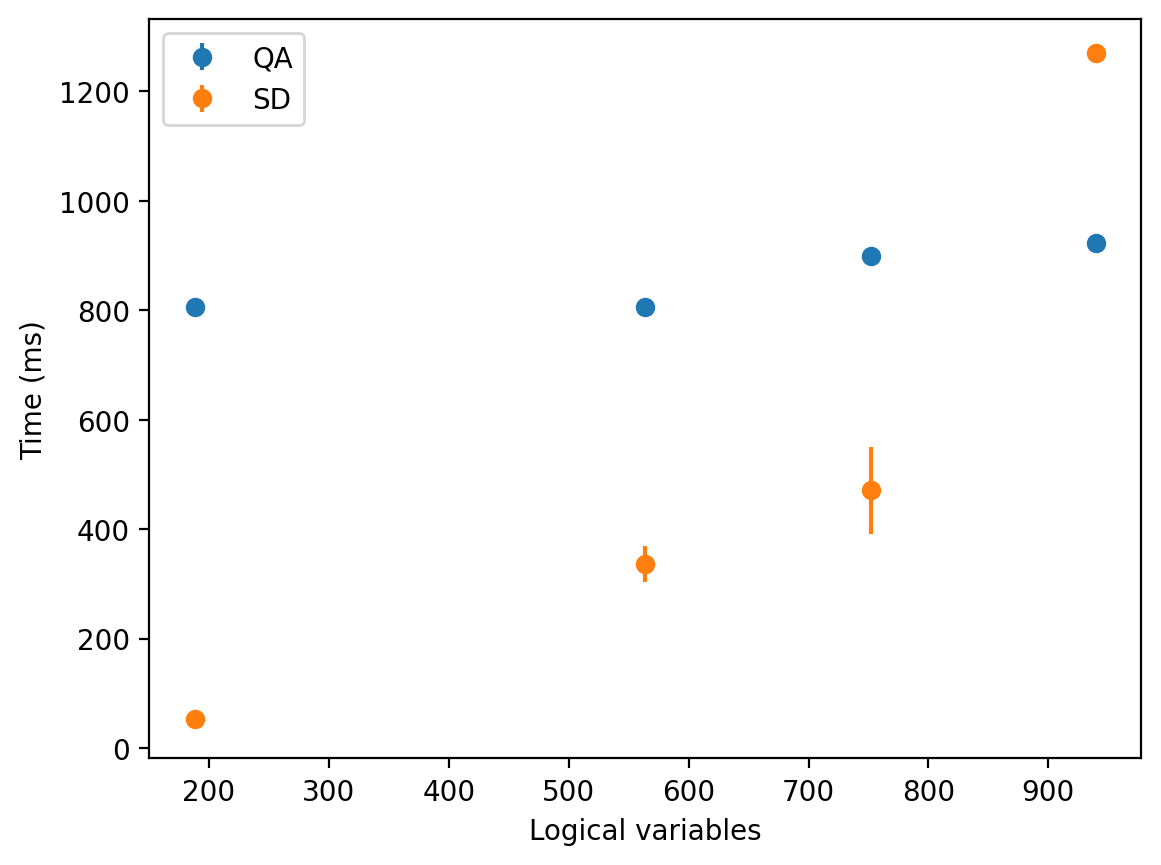

In [11]:
def plotTimeVariables(filename: str, identifiers: list[str], reads: int = 1000, label: str = ""):

    variables = []
    entries = []
    means = []
    stderr = []

    for i in identifiers:
        path = f"../Pickles/{i}/{i}_"
        
        embedding = json.load(open(path + "embedding.json", "r"))
        bqm = BinaryQuadraticModel.from_serializable(json.load(open(path + "bqm.json", "r")))

        variables.append(len(embedding))
        entries.append(sum(bqm.shape))

        data = pd.read_csv(path+filename)
        query = data.query(f"`Total reads` == {reads}")["Time"]
        means.append(np.mean(query)/1000)
        stderr.append(np.std(query)/np.sqrt(len(query))/1000)

    plt.errorbar(variables, means, yerr=stderr, fmt='o', label=label)
    plt.xlabel("Logical variables")
    plt.ylabel("Time (ms)")

identifiers = ["Haydn-1", "Haydn-2", "Haydn-3", "Haydn-4"]
plotTimeVariables("qa-reads.csv", identifiers, 2000, "QA")
plotTimeVariables("sd-reads.csv", identifiers, 2000, "SD")
#plotTimeVariables("sa-reads.csv", identifiers, 2000, "SA")
plt.legend()
plt.show()

In [37]:
sampleset = sampler.sample(bqm, num_reads=100, label=f"Haydn_{100}")